In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

##1.讀入Fashion MNIST 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##2.欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


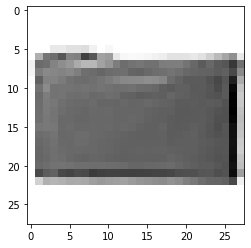

In [5]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

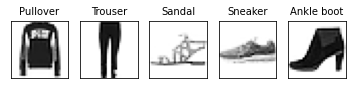

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]],fontsize =10)
    plt.imshow(x_train[n], cmap='Greys')

##3.開始打造神經網路

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
x_train = x_train/255 #色彩範圍為0到255所以要除於255
x_test  = x_test/255

In [10]:
x_train.shape #檢測資料型態

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784) #整理資料
x_test = x_test.reshape(10000, 784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

activation = relu

*  layer 1: 200 neurons
*  layer 2: 150 neurons

*  layer 3: 150 neurons
*  output layer: 10 neurons

In [0]:
model.add(Dense(200, input_dim=784, activation='relu'))

In [0]:
model.add(Dense(150, activation='relu'))

In [0]:
model.add(Dense(150, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

##4.組裝神經網路

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.099), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 211,310
Trainable params: 211,310
Non-trainable params: 0
_________________________________________________________________


In [22]:
one = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=88, epochs=21) #學習率和訓練次數做更動

Epoch 1/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0674 - accuracy: 0.5062 - val_loss: 0.0449 - val_accuracy: 0.6804
Epoch 2/21
682/682 [==============================] - 4s 5ms/step - loss: 0.0378 - accuracy: 0.7413 - val_loss: 0.0350 - val_accuracy: 0.7685
Epoch 3/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0305 - accuracy: 0.8052 - val_loss: 0.0298 - val_accuracy: 0.8020
Epoch 4/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0271 - accuracy: 0.8206 - val_loss: 0.0280 - val_accuracy: 0.8117
Epoch 5/21
682/682 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.8295 - val_loss: 0.0260 - val_accuracy: 0.8218
Epoch 6/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0243 - accuracy: 0.8357 - val_loss: 0.0251 - val_accuracy: 0.8277
Epoch 7/21
682/682 [==============================] - 3s 5ms/step - loss: 0.0234 - accuracy: 0.8418 - val_loss: 0.0244 - val_accuracy: 0.8326
Epoch 

In [23]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


##5.訓練成果

第幾筆:60
我的預測是： Sneaker , 正確答案： Sneaker


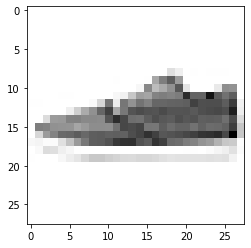

In [24]:
n = eval(input("第幾筆:"))

list=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(0,9):
    if y_test[n][i]!=0:
        a=i
print('我的預測是：',list[result[n]],', 正確答案：',list[a])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys');


##6.額外的小測試
發現其他人切割數據來防止Overfitting，我也想試試看

這次用前50000筆做驗證，後10000筆做測試最後再跟上個模型做比較。

In [0]:
x_train2 = x_train[0:50000]
y_train2 = y_train[0:50000]
x_test2 = x_train[50001:60000]
y_test2 = y_train[50001:60000]

In [0]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(150, activation='relu'))
model2.add(Dense(150, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='mse', optimizer=SGD(lr=0.099), metrics=['accuracy'])

In [27]:
two = model2.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), batch_size=88, epochs=21)

Epoch 1/21
569/569 [==============================] - 3s 5ms/step - loss: 0.0702 - accuracy: 0.5107 - val_loss: 0.0477 - val_accuracy: 0.6664
Epoch 2/21
569/569 [==============================] - 3s 4ms/step - loss: 0.0408 - accuracy: 0.7196 - val_loss: 0.0366 - val_accuracy: 0.7655
Epoch 3/21
569/569 [==============================] - 3s 4ms/step - loss: 0.0329 - accuracy: 0.7896 - val_loss: 0.0307 - val_accuracy: 0.8027
Epoch 4/21
569/569 [==============================] - 2s 4ms/step - loss: 0.0289 - accuracy: 0.8122 - val_loss: 0.0283 - val_accuracy: 0.8100
Epoch 5/21
569/569 [==============================] - 3s 4ms/step - loss: 0.0267 - accuracy: 0.8217 - val_loss: 0.0277 - val_accuracy: 0.8115
Epoch 6/21
569/569 [==============================] - 2s 4ms/step - loss: 0.0254 - accuracy: 0.8301 - val_loss: 0.0253 - val_accuracy: 0.8284
Epoch 7/21
569/569 [==============================] - 3s 4ms/step - loss: 0.0243 - accuracy: 0.8354 - val_loss: 0.0246 - val_accuracy: 0.8303
Epoch 

透過圖表觀察兩個模型的訓練準確率差異

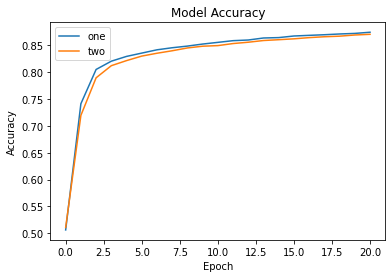

In [29]:
plt.plot(one.history['accuracy']);
plt.plot(two.history['accuracy']);
plt.title('Model Accuracy');
plt.ylabel('Accuracy');
plt.xlabel('Epoch');
plt.legend(['one', 'two'], loc='upper left');

透過圖表來看兩個模型驗證集的錯誤率

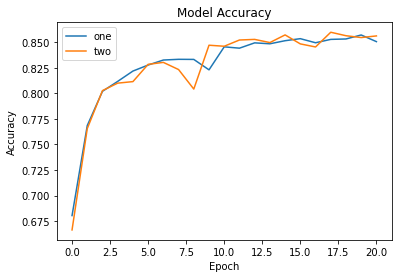

In [30]:
plt.plot(one.history['val_accuracy']);
plt.plot(two.history['val_accuracy']);
plt.title('Model Accuracy');
plt.ylabel('Accuracy');
plt.xlabel('Epoch');
plt.legend(['one', 'two'], loc='upper left');

這樣看一看後，發現兩者差異不大應該不存在overfitting的問題。(不過其實我也不清楚是不是要這樣看)